In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('uber.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1)

In [6]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.shape

(200000, 7)

In [8]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [12]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [14]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [15]:
df = df.drop('pickup_datetime',axis=1)

In [16]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

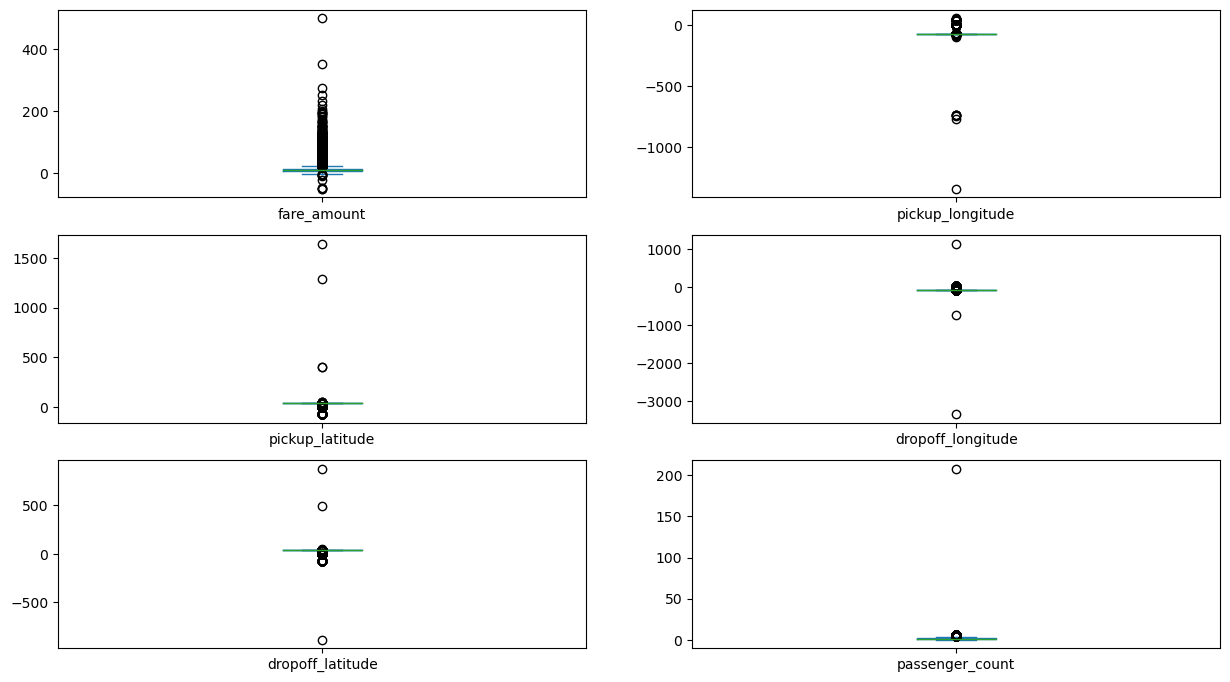

In [18]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize = (15,20))

In [20]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

In [21]:
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1


In [22]:
df = treat_outliers_all(df , df.iloc[: , 0::])

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

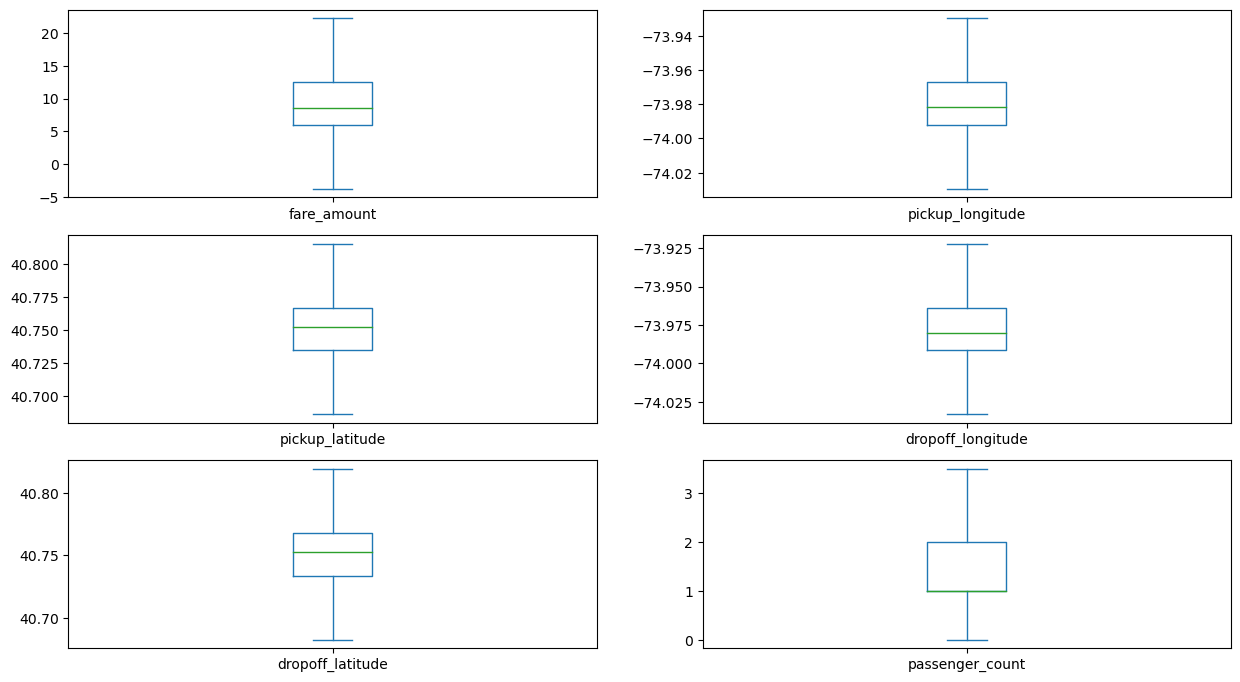

In [40]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 

In [41]:
from math import *
    
def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range (len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1
        
        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2
        
        #radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371 
        travel_dist.append(c)
            
    return  travel_dist

In [43]:
df['dist_travel_km'] = distance_formula(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,4.116083


In [44]:
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 7)


In [45]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                    (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                    (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                    (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                                    ]

In [46]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,4.116083


In [47]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [48]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,4.116083


In [49]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dist_travel_km       0
dtype: int64

<Axes: >

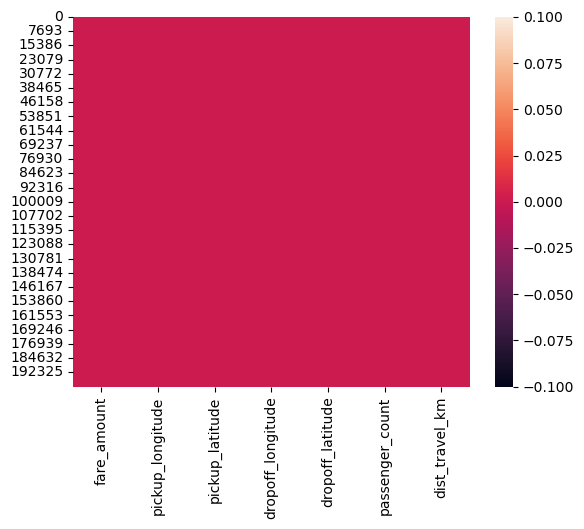

In [50]:
sns.heatmap(df.isnull())

In [51]:
corr = df.corr() 
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125898,0.015778,0.786385
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073290,-0.013213,0.048446
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515714,-0.012889,-0.073362
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245667,-0.009303,0.155191
dropoff_latitude,-0.125898,0.073290,0.515714,0.245667,1.000000,-0.006308,-0.052701
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.009884
dist_travel_km,0.786385,0.048446,-0.073362,0.155191,-0.052701,0.009884,1.000000


<Axes: >

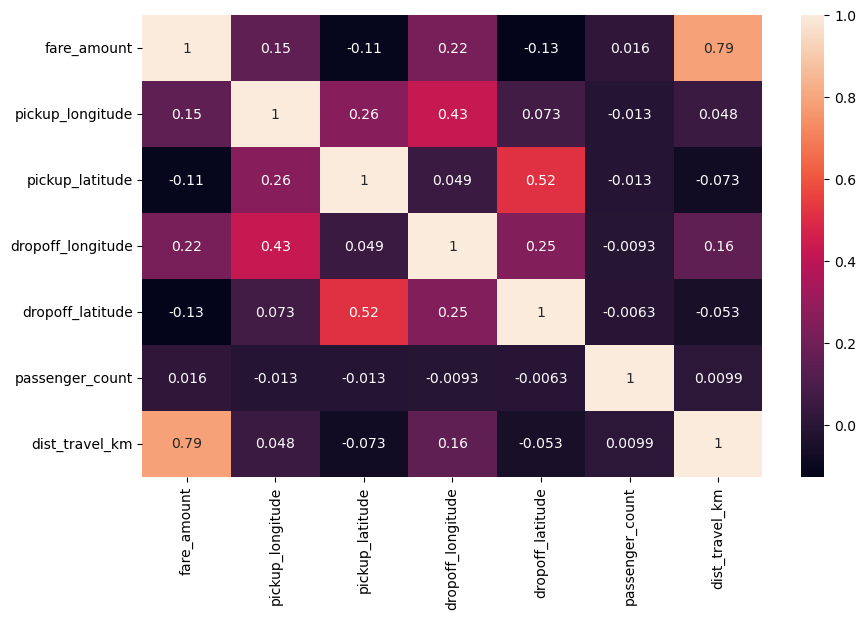

In [52]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)

In [53]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','dist_travel_km']]
y = df['fare_amount']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [55]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [56]:
regression.fit(X_train,y_train)

LinearRegression()

In [57]:
regression.intercept_

4453.488920352471

In [58]:
regression.coef_

array([ 26.28270203,  -7.49535476,  19.80445551, -18.00814423,
         0.05789741,   1.85282064])

In [60]:
prediction = regression.predict(X_test)
print(prediction)

[12.66082957  8.22262788 17.57340506 ... 11.56533245 16.49239803
  7.66453748]


In [61]:
y_test

57548     12.50
155118     5.70
36978     13.30
117654    19.00
56271     22.00
          ...  
183438    15.00
6053      22.25
54440     10.50
110564    13.30
8992       7.00
Name: fare_amount, Length: 66000, dtype: float64

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.6469091052677084

In [63]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)

In [64]:
MSE

10.49862567523084

In [65]:
RMSE = np.sqrt(MSE)
RMSE

3.240158279348532

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [69]:
y_pred = rf.predict(X_test)
y_pred

array([13.9305,  7.605 , 17.263 , ..., 13.807 , 15.767 ,  5.57  ])

In [70]:
R2_Random = r2_score(y_test,y_pred)
R2_Random

0.7600066821061223

In [71]:
MSE_Random = mean_squared_error(y_test,y_pred)
MSE_Random

7.135839656909945

In [72]:
RMSE_Random = np.sqrt(MSE_Random)
RMSE_Random

2.671299245107134